# Weather Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('C:/Users/shahu/Downloads/archive (3)/Weather Data.csv')

In [38]:
print("Data Information:")
print(data.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date/Time          8784 non-null   object 
 1   Temp_C             8784 non-null   float64
 2   Dew Point Temp_C   8784 non-null   float64
 3   Humidity           8784 non-null   int64  
 4   Wind Speed_km/h    8784 non-null   int64  
 5   Visibility_km      8784 non-null   float64
 6   Press_kPa          8784 non-null   float64
 7   Weather_condition  8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB
None


In [39]:
print("\nData Statistics:")
print(data.describe().transpose())


Data Statistics:
                   count        mean        std    min     25%     50%  \
Temp_C            8784.0    8.798144  11.687883 -23.30    0.10    9.30   
Dew Point Temp_C  8784.0    2.555294  10.883072 -28.50   -5.90    3.30   
Humidity          8784.0   67.431694  16.918881  18.00   56.00   68.00   
Wind Speed_km/h   8784.0   14.945469   8.688696   0.00    9.00   13.00   
Visibility_km     8784.0   27.664447  12.622688   0.20   24.10   25.00   
Press_kPa         8784.0  101.051623   0.844005  97.52  100.56  101.07   

                     75%     max  
Temp_C             18.80   33.00  
Dew Point Temp_C   11.80   24.40  
Humidity           81.00  100.00  
Wind Speed_km/h    20.00   83.00  
Visibility_km      25.00   48.30  
Press_kPa         101.59  103.65  


In [40]:
data.rename(columns={'Rel Hum_%': 'Humidity', 'Weather': 'Weather_condition'}, inplace=True)

In [41]:
missing_values_per_column = data.isnull().sum()
any_missing_values = data.isnull().any().any()
print("Missing values per column:")
print(missing_values_per_column)
print("\nAre there any missing values in the DataFrame? ", any_missing_values)

Missing values per column:
Date/Time            0
Temp_C               0
Dew Point Temp_C     0
Humidity             0
Wind Speed_km/h      0
Visibility_km        0
Press_kPa            0
Weather_condition    0
dtype: int64

Are there any missing values in the DataFrame?  False


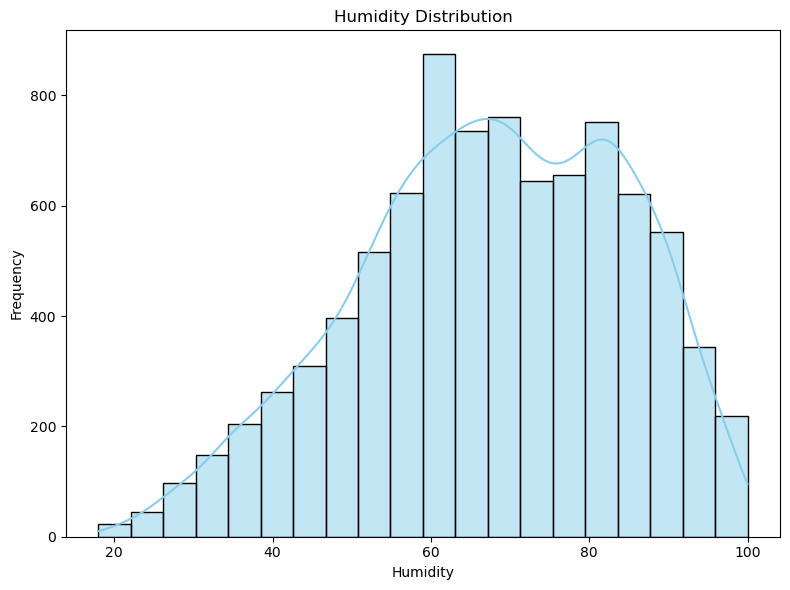

In [42]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Humidity'], bins=20, color='skyblue', kde=True)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Humidity Distribution')
plt.tight_layout()
plt.show()

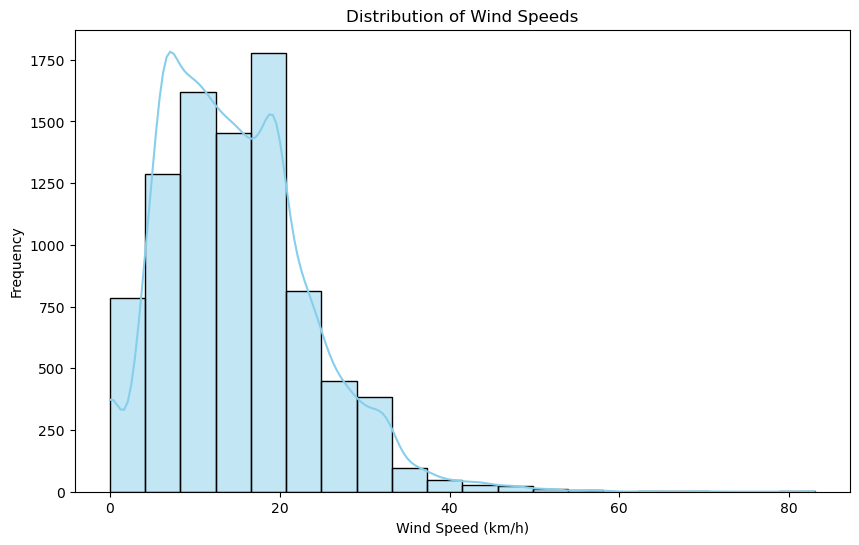

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Wind Speed_km/h'], bins=20, color='skyblue', kde=True)
plt.title('Distribution of Wind Speeds')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.show()

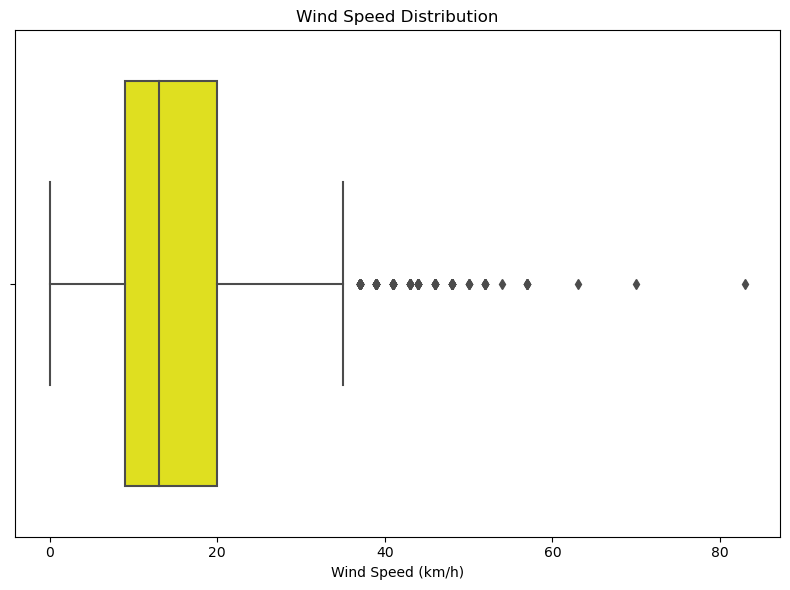

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Wind Speed_km/h'], color='yellow')
plt.xlabel('Wind Speed (km/h)')
plt.title('Wind Speed Distribution')
plt.tight_layout()
plt.show()

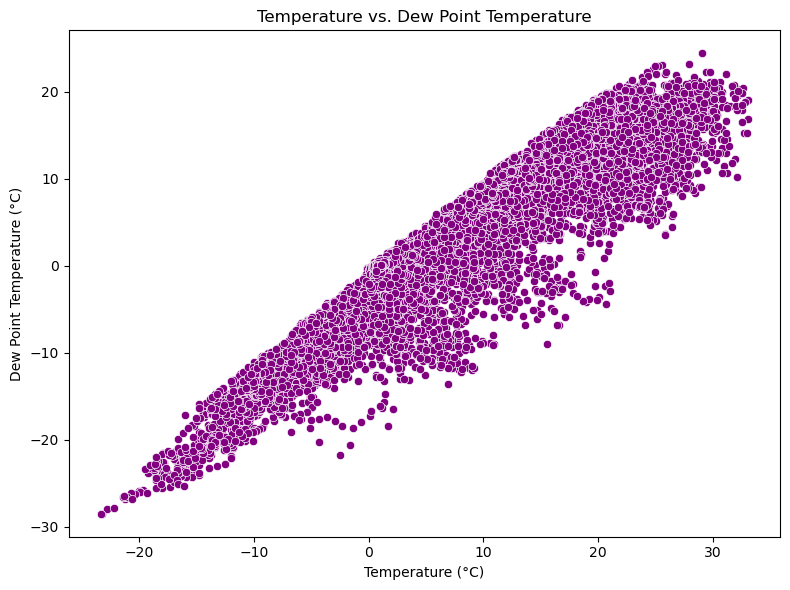

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temp_C', y='Dew Point Temp_C', data=data, color='purple')
plt.xlabel('Temperature (°C)')
plt.ylabel('Dew Point Temperature (°C)')
plt.title('Temperature vs. Dew Point Temperature')
plt.tight_layout()
plt.show()

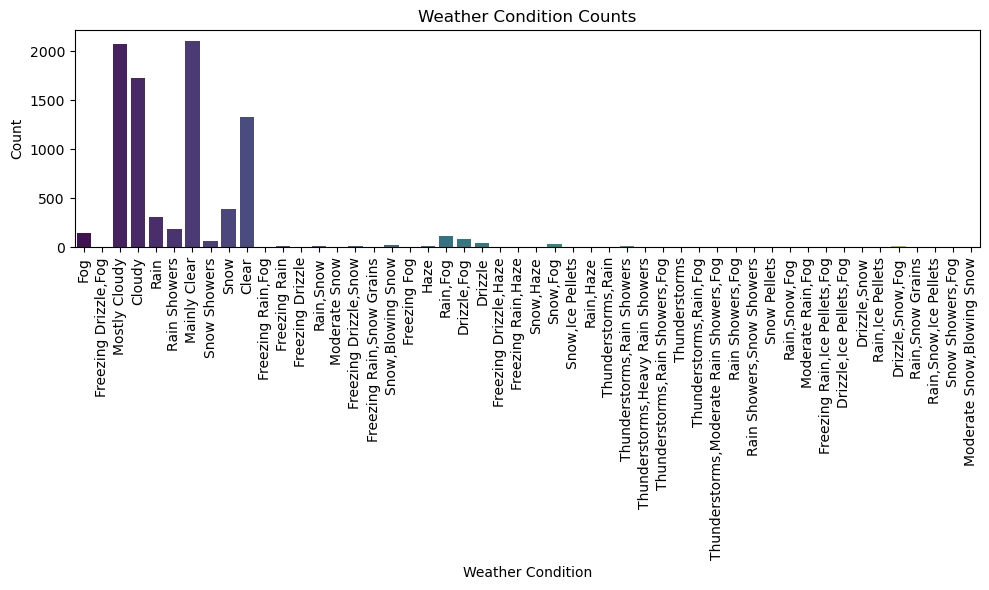

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_condition', data=data, palette='viridis')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.title('Weather Condition Counts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [47]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

In [48]:
data['Year'] = data['Date/Time'].dt.year
data['Month'] = data['Date/Time'].dt.month
data['Day'] = data['Date/Time'].dt.day
data['Hour'] = data['Date/Time'].dt.hour

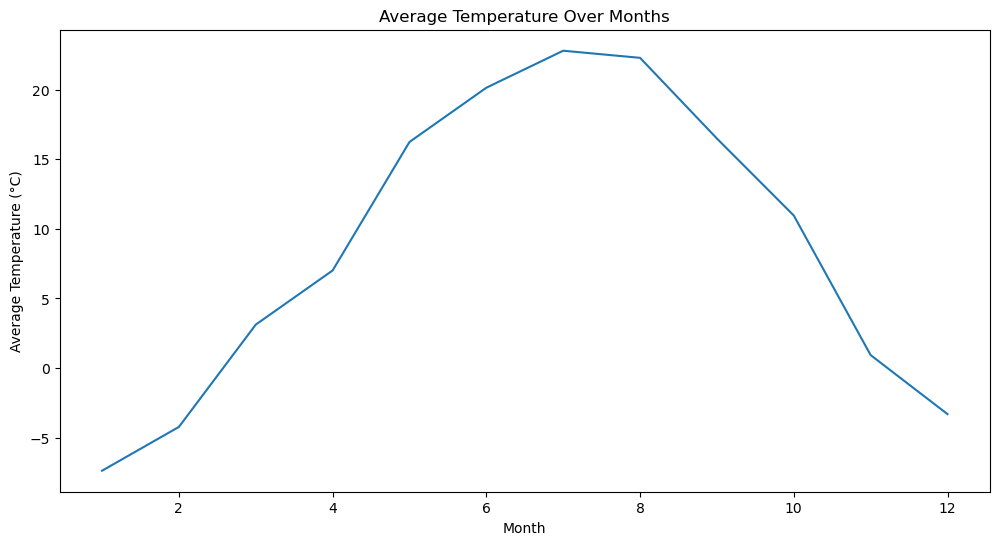

In [49]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Temp_C', data=data.groupby('Month')['Temp_C'].mean().reset_index())
plt.title('Average Temperature Over Months')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.show()